# Introduction

In this part, I will make clusterings on my record data and labeled data using 3 unsupervised clustering algorithms: K-Means, DBSCAN and hierarchical clustering. The purpose is that I want to have a look at whether these 3 methods could process my data and find natural clusters(groups) if they exist in the data.

For my data, I will divide a feature `X` without any label to satisfy the clustering algorithm. I want to use these three algorithms to cluster the data and try to see how the clustering without labels resembles the results of the labels that come with the original dataset.

# Theory

1. Kmeans clustering can be said to be the most common clustering algorithm, it is based on the division method clustering, the principle is to first initialize k cluster class centers, based on the calculation of the distance between the sample and the centroid to group the samples belonging to each cluster class, iteration to achieve the goal of the minimum distance between the sample and the center of the cluster class to which it belongs.
   
   Besides launching a baseline model for kmeans using scikit-learn, I use a elbow method to make sure the optimal number of clusters. By drawing graphs and making some random try, I finally determine the optimal parameters.

2. The principle of DBSCAN is to identify points in "crowded" regions of the feature space where many data points are close together. These regions are called dense regions in the feature space. The idea behind DBSCAN is that clusters form dense regions of data separated by relatively empty regions.
   
   DBSCAN is more complex than Kmeans, it can process non-linear data. In the implementation, I try to select the optimal `eps` and `min_samples` in the model and make a lot of try.

3. Hierarchical clustering is the hierarchical decomposition of a given set of data objects. According to the decomposition strategy used for hierarchical decomposition, hierarchical clustering can be further divided into cohesive (agglomerative, i.e., top-down) and divisive (i.e., bottom-up) hierarchical clustering.
   
   The most notable feature of hierarchial clustering is that it uses dendrograms to visualize the clustering results and people can have different and multiple clustering results using only one simple dendrogram. 

Import packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
sns.set()

Import data and make a quick view. In previous classification works, the data should contain labels, but here I will divide my feature X without labels. In my data set, the label column is `Credit_Score`.

In [2]:
df = pd.read_csv("clean_record_data.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,1,0,0,0
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,0,1,0,0
2,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,1,0,0,0,0
4,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,0,1,0,0,0,1,0,0,0,0


In [74]:
df_samp = df.sample(frac =.25)
df_samp.shape

(24450, 40)

# Data Selection

In [75]:
X = df_samp.drop(columns=['Credit_Score'])
y = df_samp['Credit_Score']

# Baseline Model of KMeans

In [76]:
# Here I set the initial n_clusters = 3 because the dataset has 3 labels.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [5]:
kmeans.cluster_centers_

array([[ 1.25266702,  0.64117957, -0.10344523, -0.05273967, -0.10529212,
         0.38541962,  0.4063738 ,  0.55674476,  0.46932422,  0.77304092,
         0.3909007 ,  0.35709612,  0.54019389,  0.79111011, -0.05840575,
         0.40455057,  0.05471967, -0.18355554,  0.06149353,  0.07021458,
         0.0637245 ,  0.05784286,  0.06254817,  0.06234535,  0.06319718,
         0.0648197 ,  0.05731554,  0.06226423,  0.06242648,  0.05893806,
         0.06137184,  0.06279155,  0.12870645,  0.13527765,  0.25270758,
         0.11227842,  0.10599116,  0.13953677,  0.25420841],
       [ 1.25847846,  0.64201521, -0.22922703,  0.05000701,  0.01612567,
        -0.43707688, -0.129593  , -0.55165871, -0.42703861, -0.2226287 ,
        -0.88113673,  0.05737943, -0.70091177, -0.43176659,  0.16170939,
        -0.27413272,  0.20348263,  0.35663912,  0.06372715,  0.06115426,
         0.0635181 ,  0.06194221,  0.0634377 ,  0.06250503,  0.05853313,
         0.0648367 ,  0.06010903,  0.06337337,  0.06379147,  0.

**Inertia** is not a normalized metric. The lower values of inertia are better and zero is optimal. But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

In [6]:
kmeans.inertia_

638137.1657690927

check how many of the samples were correctly labeled

In [7]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 42144 out of 97799 samples were correctly labeled.


In [8]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.43


Here we can see that from the initial parameter, we get a pretty low clustering accuracy. This is not what we want so next I will use elbow method to find optimal number of clusters. This process could also be known as **hyper-parameter tuning**.

## Hyper-parameter Tuning

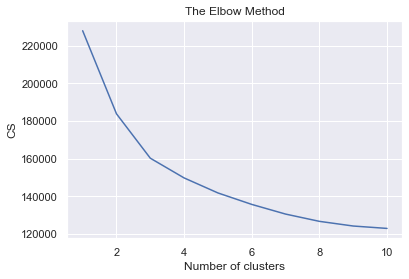

In [53]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=3. Hence k=3 can be considered a good number of the cluster to cluster this data. But, we have seen that I have achieved a weak classification accuracy of 25% with k=3. So, my weak unsupervised classification model achieved a very weak classification accuracy of 25%. Next I will check the model accuracy with different number of clusters.

**K-Means model with 2 clusters**

In [54]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 8726 out of 24450 samples were correctly labeled.
Accuracy score: 0.36


**K-Means model with 4 clusters**

In [55]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 5081 out of 24450 samples were correctly labeled.
Accuracy score: 0.21


**Visualize the optimal model**

Text(0.5, 1.0, 'Kmeans')

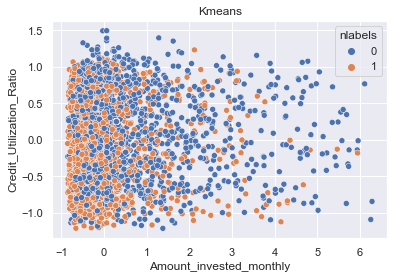

In [67]:
bestK = KMeans(n_clusters=2, random_state=0)
labels = bestK.fit_predict(X)
adv = X.copy()
adv['nlabels'] = labels
sns.scatterplot(x='Amount_invested_monthly', y="Credit_Utilization_Ratio",hue='nlabels',data=adv)
plt.title("Kmeans")

We have achieved a relatively high accuracy of 47% with k=2.

## Results and Conclusions
 
In this part, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

I have applied the elbow method and find that k=3 (k is number of clusters) can be considered a good number of cluster to cluster this data.

I have find that the model has very high inertia of 638137. So, this is not a good model fit to the data.

I have achieved a weak classification accuracy of 25% with k=3 by our unsupervised model.

So, I have changed the value of k and find relatively higher classification accuracy of 47% with k=2.

Hence, we can conclude that k=2 being the optimal number of clusters.

# Baseline Model for DBSCAN

In [12]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("V-measure: %0.3f" % v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % adjusted_mutual_info_score(y, labels)
)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))

Estimated number of clusters: 450
Estimated number of noise points: 56432
Homogeneity: 0.078
Completeness: 0.025
V-measure: 0.037
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.035
Silhouette Coefficient: 0.260


**Using Euclidean distance method to find optimum epsilon distance(eps)**

Biggest challenge with DBSCAN algorithm is to find right hyper parameters(eps and min_samples values) to model the algorithm.

In this method, we are trying to sort the data and try to find the distance among its neighbors to find the minimum distance between them and plot the minimum distance. This will essentially give us the elbow curve to find density of the data points and their minimum distance(eps) values

In [36]:
from sklearn.metrics.cluster import silhouette_score
range_eps = [0.1,0.2,0.3,0.4,0.5,1,2,4,5]
for i in range_eps:
    print("eps value is "+ str(i))
    db = DBSCAN(eps=i,min_samples=5).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    #print(set(labels))
    silhouette_avg = silhouette_score(X, labels)
    print("For eps value = "+str(i), labels, "The average silhouette score is :", silhouette_avg)

eps value is 0.1
For eps value = 0.1 [ -1  -1  -1 ...  -1 370  -1] The average silhouette score is : 0.2532824611137659
eps value is 0.2
For eps value = 0.2 [ -1  -1  -1 ...  -1 370  -1] The average silhouette score is : 0.2532824611137659
eps value is 0.3
For eps value = 0.3 [ -1  -1  -1 ...  -1 370  -1] The average silhouette score is : 0.2532824611137659
eps value is 0.4
For eps value = 0.4 [ -1  -1  -1 ...  -1 370  -1] The average silhouette score is : 0.2532824611137659
eps value is 0.5
For eps value = 0.5 [ -1  -1  -1 ...  -1 370  -1] The average silhouette score is : 0.2532824611137659
eps value is 1
For eps value = 1 [ -1  -1  -1 ...  -1 123  -1] The average silhouette score is : 0.06211179747001641
eps value is 2
For eps value = 2 [-1 -1  0 ...  0  0  0] The average silhouette score is : -0.10944057244362101
eps value is 4
For eps value = 4 [0 0 0 ... 0 0 0] The average silhouette score is : 0.647033580014164
eps value is 5
For eps value = 5 [0 0 0 ... 0 0 0] The average silho

Here we can see obviously that eps value 1 gives us the best silhouette score. So we choose this eps parameter as 1.

**Find the ‘min_samples’ hyper parameter through right cluster formation method**

 We choose the `eps=1` to be optimal parameter. As we have already found the ‘eps value’ to be 1. Now feeding that value to DBSCAN algorithm through various ranges of min samples from a wide range, we can find the right ‘min_samples’ value which yields us right no. of clusters. From below its evident ‘min_samples’ value should be 145 as it yields no. of clusters to be 3 which is proven by K means with silhouette score algorithm above.

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
min_samples = [80,90,100,120,130,140,145,150]
for i in min_samples:
    print("min_sample value is: " + str(i))
    db = DBSCAN(eps=1, min_samples=i).fit(X)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels = set([label for label in db.labels_ if label>=0])
    print("For min_samples values = "+str(i), "Total number of clusters are " + str(len(set(labels))))

min_sample value is: 80
For min_samples values = 80 Total number of clusters are 38
min_sample value is: 90
For min_samples values = 90 Total number of clusters are 35
min_sample value is: 100
For min_samples values = 100 Total number of clusters are 33
min_sample value is: 120
For min_samples values = 120 Total number of clusters are 15
min_sample value is: 130
For min_samples values = 130 Total number of clusters are 9
min_sample value is: 140
For min_samples values = 140 Total number of clusters are 4
min_sample value is: 145
For min_samples values = 145 Total number of clusters are 4
min_sample value is: 150
For min_samples values = 150 Total number of clusters are 3


**Build the DBSCAN algorithm using above ‘eps’ value and ‘min_samples’**

Using eps as 1 and min_samples as 145 to train the optimal DBSCAN model.

In [43]:
db = DBSCAN(eps = 1, min_samples=145).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
labels = db.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Estimated number of clusters: 4
Estimated number of noise points: 23783
Result: 241 out of 24450 samples were correctly labeled.
Accuracy score: 0.01


**Visualize the optimal model**

c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


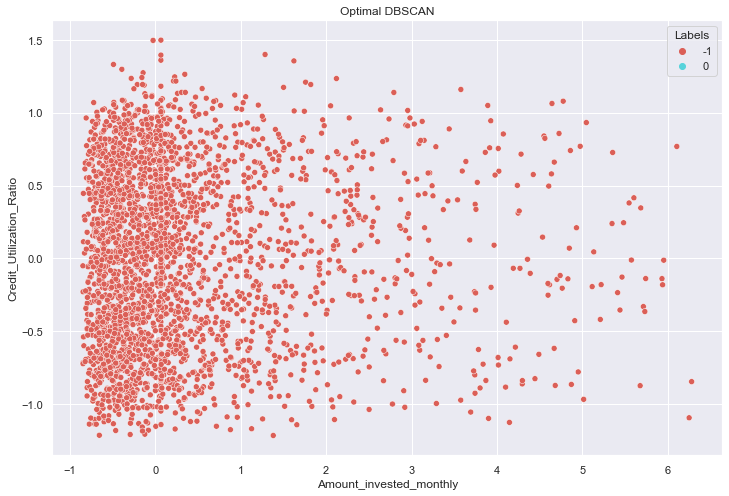

In [72]:
db = DBSCAN(eps=1, min_samples=145).fit(X)

adv['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(adv['Amount_invested_monthly'], adv['Credit_Utilization_Ratio'], hue=adv['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('Optimal DBSCAN')
plt.show()

## Results and Conclusions

From a two-step hyper-parameter tuning, I determine the optimal `eps` and `min_samples`. Choosing the optimal eps based on the best silhouette score and the optimal min_samples based on the most reasonable number of clusters. Seeing the accuracy, we could know that compared with the true label from the initial data set, it is a pretty weak method to do the clustering. But the accuracy is just a reference because the DBSCAN is a unsupervised clustering method which does not contain labels. So generally speaking I think the result here for my data set is acceptable.

# Baseline Model for Hierachial Clustering

In [4]:
data = list(zip(X, y))

Text(0, 0.5, 'Distance')

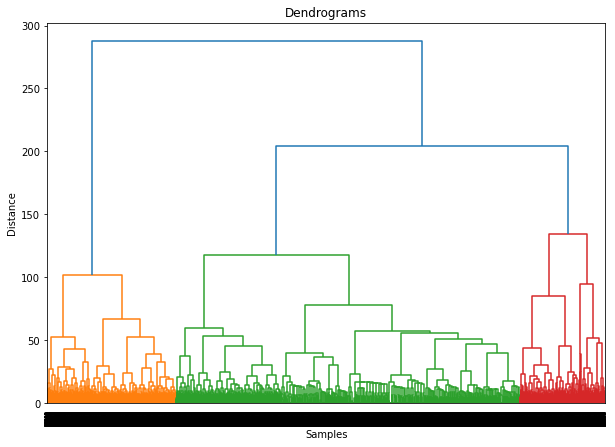

In [44]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Distance")

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 150 and cut the dendrogram:

Text(0, 0.5, 'Distance')

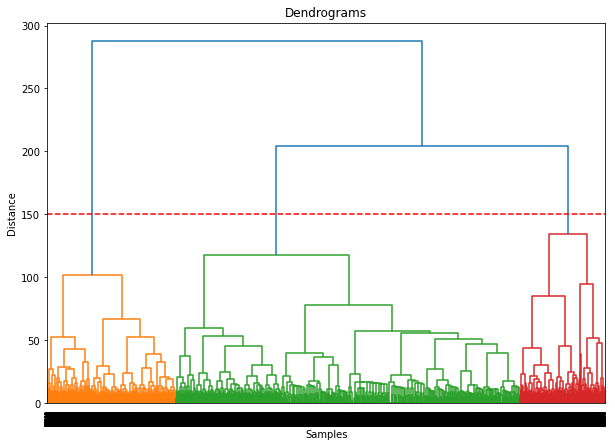

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.xlabel("Samples")
plt.ylabel("Distance")

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 1, 2, ..., 1, 2, 2], dtype=int64)

We can see the values of 0s, 1s and 2s in the output since we defined 3 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster and 2 represents points in the third cluster. Next let's see the accuracy of this clustering.

In [21]:
labels = cluster.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 6760 out of 24450 samples were correctly labeled.
Accuracy score: 0.28


Here we can see from the accuracy score which is only 28% that it is a very weak clustering. So next I will try some other hyper-parameters to see whether it can promote the model accuracy. 

## Hyper-parameter Tuning

In this part, I implement the hierachial clustering using other parameters. The hyper-parameter is `linkage`:

linkage: used to specify the linkage algorithm

- 'ward': single-linkage single-linkage, using dmin
- 'complete': full linkage-complete-linkage, using dmax
- 'average': average linkage-linkage algorithm, using davg

In [22]:
# linkage='complete'
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(X)
labels = cluster.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 7173 out of 24450 samples were correctly labeled.
Accuracy score: 0.29


In [23]:
# linkage='average'
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(X)
labels = cluster.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 7175 out of 24450 samples were correctly labeled.
Accuracy score: 0.29


The results show that hierachial clustering is a relative weak method for my data set. I have achieved a relatively high accuracy of 29% with 'complete' and 'average' linkage.

## Results and Conclusions

In this part, I have implemented the hierachial Clustering.

I have applied three different hyper parameters for linkage function and find that average and complete can be considered good ways to link.

Since the overall accuracy is pretty low, I don't think this is not a good model fit to the data.

I have achieved a weak classification accuracy of 29%.

# Final Results

In this work, we have applied the three most common clustering algorithms on the same dataset and obtained the corresponding results. In kmeans, we first classified the data into three categories based on intuition, but the clustering results were poorly matched to the labels that came with the original data, with a maximum of 47% after model tuning, but this value is only a reference, because kmeans and the two algorithms mentioned below are unsupervised learning methods.

In the second part, I implemented the DBSCAN algorithm on the dataset, using scikit learn. in this part, I parametrized two parameters, eps and min_samples, choosing the optimal eps based on the best silhouette score and the optimal min_samples based on the most reasonable number of clusters.

In the last part I did hierarchical clustering. And dendrograms are used to visualize the results. The reasonable clustering result is decided based on the divergence of dendrograms. In this part I make parameter selection for linkage, choosing among the optional methods of complete, ward and average.

# Conclusions

Overall, I think kmeans is the most ideal algorithm for clustering among these three methods, because its clustering result has the highest similarity to the original label of the data, and the complexity of the model is also the lowest, saving the training time and efficiency.

# References

1. https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289
2. https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp